In [41]:
# Cell to import the functions
from adult import read_csv_1, num_rows, column_names, missing_values, columns_with_missing_values, bachelors_masters_percentage, data_frame_without_missing_values, one_hot_encoding, label_encoding, dt_predict, dt_error_rate
# Using the functions in your notebook. For example, to read the data:
data_file = 'data/adult.csv' # Replace with the correct path to your adult.csv file
df = read_csv_1(data_file)

# Using the dataframe 'df' with other functions
number_of_rows = num_rows(df)
print(f'Number of rows: {number_of_rows}')

# Calling the functions and print the results for verification
print('Number of instances:', num_rows(df))
print('List with the attribute names:', column_names(df))
print('Number of missing values:', missing_values(df))
print('Columns with missing values:', columns_with_missing_values(df))
print(f'Percentage of instances corresponding to Bachelors or Masters: {bachelors_masters_percentage(df):.2f}%') 

# Applying the functions to the original dataframe
df_clean = data_frame_without_missing_values(df)
df_features_encoded = one_hot_encoding(df_clean)
df_target_encoded = label_encoding(df_clean)

# Checking the first few rows of the processed dataframes

df_clean.head(), df_features_encoded.head(), df_target_encoded.head()


X = df_features_encoded  # We don't drop 'class' from df_features_encoded since it only contains features after one_hot_encoding
y = df_target_encoded  # y is already a series with the encoded class labels after label_encoding

#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)
y_pred = dt_predict(X, y)
dt_error_rate(y_pred, y)

Number of rows: 48842
Number of instances: 48842
List with the attribute names: ['age', 'workclass', 'education', 'education-num', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'capitalgain', 'capitalloss', 'hoursperweek', 'native-country', 'class']
Number of missing values: 6465
Columns with missing values: ['workclass', 'occupation', 'native-country']
Percentage of instances corresponding to Bachelors or Masters: 21.87%
Starting to train the Decision Tree classifier...


c:\Users\eagua\anaconda3\envs\Data_Mining\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Finished training. Now making predictions...
Predictions complete.
Accuracy:91.72%
Training error rate: 8.28%


0.08279156162929546

Dataset loaded successfully.
First few rows of the DataFrame:
   Fresh  Milk  Grocery  Frozen  Detergents_Paper  Delicassen
0  12669  9656     7561     214              2674        1338
1   7057  9810     9568    1762              3293        1776
2   6353  8808     7684    2405              3516        7844
3  13265  1196     4221    6404               507        1788
4  22615  5410     7198    3915              1777        5185

Summary statistics:
                   mean    std  min     max
Fresh             12000  12647    3  112151
Milk               5796   7380   55   73498
Grocery            7951   9503    3   92780
Frozen             3072   4855   25   60869
Detergents_Paper   2881   4768    3   40827
Delicassen         1525   2820    3   47943
Clustering evaluation results:
        Algorithm     Data Type   k  Silhouette Score
0          KMeans      Original   3          0.477018
1   Agglomerative      Original   3          0.375016
2          KMeans      Original   5         

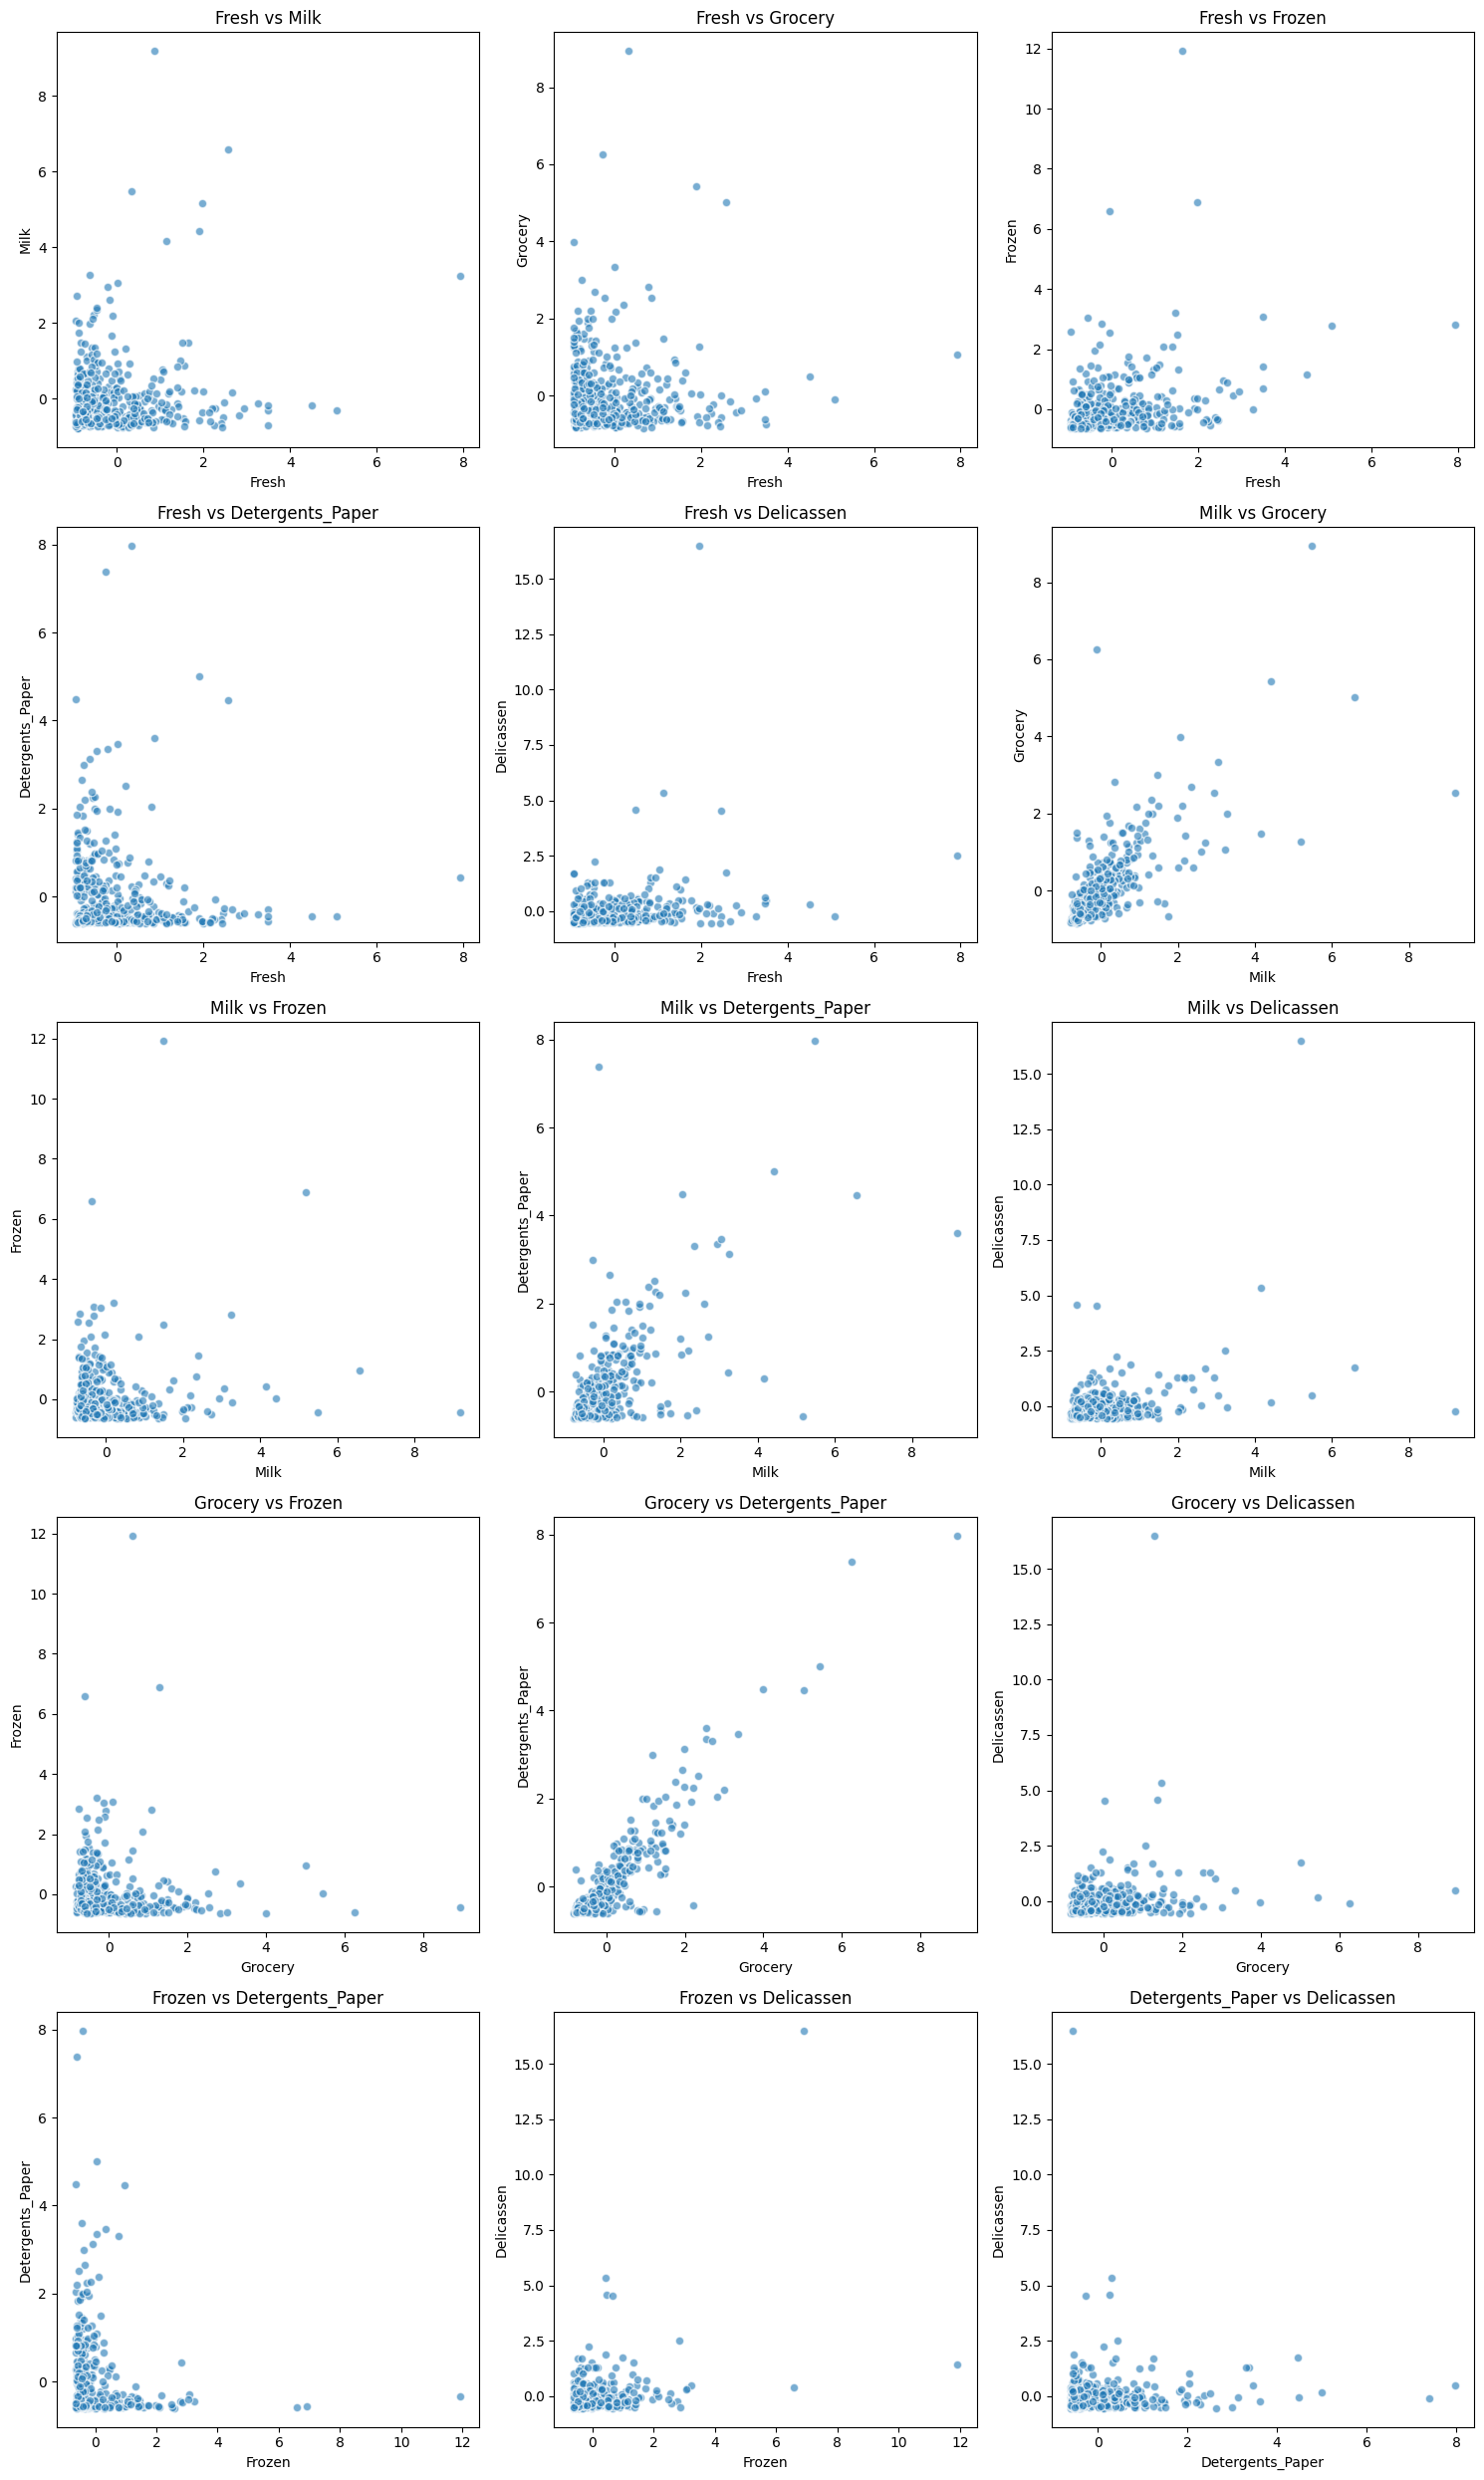

In [40]:
# Cluster Analysis Notebook
from wholesale_customers import read_csv_2, summary_statistics, standardize, best_clustering_score, scatter_plots, cluster_evaluation
# Load the dataset
data_file = 'data/wholesale_customers.csv'
df = read_csv_2(data_file)
print("Dataset loaded successfully.")

# Displaying the first few rows of the DataFrame
print("First few rows of the DataFrame:")
print(df.head())

# Computing the mean, standard deviation, minimum, and maximum value for each attribute
summary_stats = summary_statistics(df)
print("\nSummary statistics:")
print(summary_stats)

# Standardizing the data set before clustering
standardized_df = standardize(df)

# Performing cluster evaluation
results_df, best_score, best_labels = cluster_evaluation(df)

# Displaying the results DataFrame
print("Clustering evaluation results:")
print(results_df)

# Finding and print the best silhouette score using the 'best_clustering_score' function
max_silhouette_score = best_clustering_score(results_df)
print(f"\nThe best silhouette score is: {max_silhouette_score}")

# Since 'cluster_evaluation' already returns the best score and labels, we are using them directly.
print(f"\nUsing directly obtained best score: {best_score}")

# Visualizing the best set of clusters
scatter_plots(standardized_df)



In [39]:
import pandas as pd
from coronavirus_tweets import read_csv_3, get_sentiments, second_most_popular_sentiment, date_most_popular_tweets, lower_case, remove_non_alphabetic_chars, remove_multiple_consecutive_whitespaces, tokenize, count_words_with_repetitions, count_words_without_repetitions, remove_stop_words, stemming, frequent_words, mnb_predict, mnb_accuracy

# Assuming 'data_file' is a string with the path to your CSV file:
data_file = 'data/coronavirus_tweets.csv'

df = read_csv_3(data_file) # Loading the dataset and perform initial analysis
sentiments = get_sentiments(df) # Gettting the list of possible sentiments
second_popular = second_most_popular_sentiment(sentiments) # Gettting the second most popular sentiment
most_positive_date = date_most_popular_tweets(df) # Gettting the date with the most 'Extremely Positive' tweets

# Printing out the results
print(f"Possible sentiments: {sentiments}")
print(f"Second most popular sentiment: {second_popular}")
print(f"Date with most 'Extremely Positive' tweets: {most_positive_date}")

# Preprocessing the tweets
df = lower_case(df)
df = remove_non_alphabetic_chars(df)
df = remove_multiple_consecutive_whitespaces(df)
df = tokenize(df)
print(f"\nTweets after pre-processing steps:\n {df['ProcessedTweet'].head(5)}")
print(f"\nTokenized tweets:\n {df['Tokens'].head(5)}")

# Counting words
total_word_count = count_words_with_repetitions(df)
distinct_word_count = count_words_without_repetitions(df)
most_common_words = frequent_words(df, 10)

# Outputing results
print(f"\nTotal word count (with repetitions):\n{total_word_count}")
print(f"Distinct word count: {distinct_word_count}")
print(f"10 most frequent words: {most_common_words}")

df = remove_stop_words(df)
df = stemming(df)

print("\nTokens after removing stop words and stemming:")
print(df['Tokens'].head(5))
most_common_words_tokens = frequent_words(df, 10)
print(f"10 most frequent words after stemming and stop words:\n {most_common_words_tokens}")

# Building and evaluating the Multinomial Naive Bayes classifier
y_pred, y_true = mnb_predict(df)
accuracy = mnb_accuracy(y_pred, y_true)
print(f"Multinomial Naive Bayes accuracy: {accuracy}")

c:\Users\eagua\Downloads\enrique_molero_23071339\enrique_molero_23071339\coronavirus_tweets.py:35: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['TweetAt'] = pd.to_datetime(df['TweetAt'])


Possible sentiments: Sentiment
Positive              11422
Negative               9917
Neutral                7713
Extremely Positive     6624
Extremely Negative     5481
Name: count, dtype: int64
Second most popular sentiment: Negative
Date with most 'Extremely Positive' tweets: 2020-03-25

Tweets after pre-processing steps:
 0    menyrbie phil gahan chrisitv https t co ifz fa...
1    advice talk to your neighbours family to excha...
2    coronavirus australia woolworths to give elder...
3    my food stock is not the only one which is emp...
4    me ready to go at supermarket during the covid...
Name: ProcessedTweet, dtype: object

Tokenized tweets:
 0    [menyrbie, phil, gahan, chrisitv, https, t, co...
1    [advice, talk, to, your, neighbours, family, t...
2    [coronavirus, australia, woolworths, to, give,...
3    [my, food, stock, is, not, the, only, one, whi...
4    [me, ready, to, go, at, supermarket, during, t...
Name: Tokens, dtype: object

Total word count (with repetitions):